In [1]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga
from State import State
from GenerateDemandMonthly import GenerateDemandMonthly
from GeneticAlgoState import GeneticAlgoState

In [2]:
genstate = GeneticAlgoState(30)
genstate.create_state([-1,0, 1, 1, 2, 2])

#print(-1 * genstate.GArun([58,69,41,52,49,52]))

def f(X):
    return -1 * genstate.GArun(X)

In [4]:
def f(X):
    return -1 * genstate.GArun2(X)

varbound=np.array([[20,80], [120, 200]]*36)

algorithm_param = {'max_num_iteration': 1000,\
                   'population_size':100,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

model=ga(function=f,dimension=72,variable_type='int',variable_boundaries=varbound, algorithm_parameters=algorithm_param)
 

In [5]:
model.run()

IndexError: index 100 is out of bounds for axis 0 with size 72

 The best solution found:                                                                           
 [122.  78.  78.  57. 182. 185. 152.]

 Objective function:
 -46888.822000000015


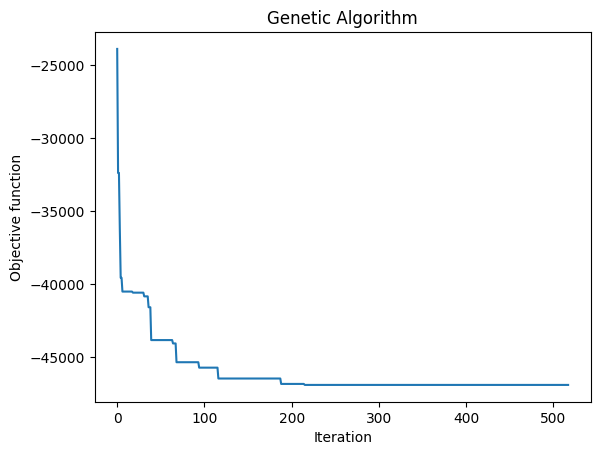

In [3]:
def g(X):
    return -1 * genstate.GArun_no_season(X) #7 parameters

varbound=np.array([[120, 200],[20, 80], [20,80], [20,80], [120, 200], [120, 200], [120, 200]])

algorithm_param = {'max_num_iteration': 750,\
                   'population_size':100,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':300}


model2=ga(function=g,dimension=7,variable_type='int',variable_boundaries=varbound, algorithm_parameters=algorithm_param)

model2.run()